In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets, cross_validation

S:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


给出加载数据集的函数：

In [2]:
def load_classification_data():
    digits = datasets.load_digits()
    X_train = digits.data
    y_train = digits.target
    return cross_validation.train_test_split(X_train,y_train,test_size=0.25,
                                            random_state=0,stratify=y_train)

In [3]:
def create_regression_data(n):
    X = 5*np.random.rand(n,1)
    y = np.sin(X).ravel()
    y[::5] += 1*(0.5 - np.random.rand(int(n/5)))
    return cross_validation.train_test_split(X,y,test_size=0.25,random_state=0)

**kNN分类器**KNeighborsClassifier

首先使用 KNeighborsClassifier给出测试函数：

In [4]:
def test_KNeighborsClassifier(*data):
    X_train,X_test,y_train,y_test = data
    clf = neighbors.KNeighborsClassifier()
    clf.fit(X_train,y_train)
    print("Training Score:%f"%(clf.score(X_train,y_train)))
    print("Testing Score:%f"%(clf.score(X_test,y_test)))

调用该函数：

In [5]:
X_train,X_test,y_train,y_test = load_classification_data()
test_KNeighborsClassifier(X_train,X_test,y_train,y_test)

Training Score:0.991091
Testing Score:0.980000


考察一：k值及投票策略对预测性能的影响：

In [6]:
def test_KNeighborsClassifier_k_w(*data):
    X_train,X_test,y_train,y_test = data
    Ks = np.linspace(1,y_train.size,num = 100, endpoint = False, dtype = 'int')
    weights=['uniform','distance']
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for weight in weights:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            clf = neighbors.KNeighborsClassifier(weights = weight, n_neighbors = K)
            clf.fit(X_train,y_train)
            training_scores.append(clf.score(X_train,y_train))
            testing_scores.append(clf.score(X_test,y_test))
        ax.plot(Ks,testing_scores,label="testing score:weight=%s"%weight)
        ax.plot(Ks,training_scores,label="training score:weight=%s"%weight)
    ax.legend(loc = 'best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.set_title("KNeighborsClassifier")
    plt.show()

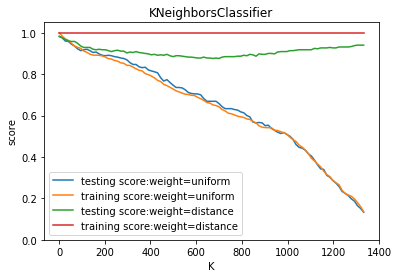

In [7]:
X_train,X_test,y_train,y_test = load_classification_data()
test_KNeighborsClassifier_k_w(X_train,X_test,y_train,y_test)

考察二：p值（距离函数）对预测性能的影响

In [8]:
def test_KNeighborsClassifier_k_p(*data):
    X_train,X_test,y_train,y_test = data
    Ks = np.linspace(1,y_train.size,endpoint = False,dtype = 'int')
    Ps = [1,2,10]
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for P in Ps:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            clf = neighbors.KNeighborsClassifier(p = P, n_neighbors = K)
            clf.fit(X_train,y_train)
            training_scores.append(clf.score(X_train,y_train))
            testing_scores.append(clf.score(X_test,y_test))
        ax.plot(Ks,testing_scores,label="testing score:p=%s"%P)
        ax.plot(Ks,training_scores,label="training score:p=%s"%P)
    ax.legend(loc = 'best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.set_title("KNeighborsClassifier")
    plt.show()

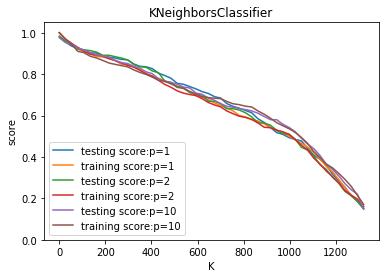

In [9]:
X_train,X_test,y_train,y_test = load_classification_data()
test_KNeighborsClassifier_k_p(X_train,X_test,y_train,y_test)

___

**kNN回归器**KNeighborsRegressor

In [11]:
def test_KNeighborsRegressor(*data):
    X_train,X_test,y_train,y_test = data
    regr = neighbors.KNeighborsRegressor()
    regr.fit(X_train,y_train)
    print("Training Score:%f"%(regr.score(X_train,y_train)))
    print("Testing Score:%f"%(regr.score(X_test,y_test)))

In [12]:
X_train,X_test,y_train,y_test = create_regression_data(1000)
test_KNeighborsRegressor(X_train,X_test,y_train,y_test)

Training Score:0.976408
Testing Score:0.963205


考察k值及投票策略对预测性能得影响：

In [13]:
def test_KNeighborsRegressor_k_w(*data):
    X_train,X_test,y_train,y_test = data
    Ks = np.linspace(1,y_train.size,num = 100, endpoint = False, dtype = 'int')
    weights=['uniform','distance']
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for weight in weights:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            regr = neighbors.KNeighborsRegressor(weights = weight, n_neighbors = K)
            regr.fit(X_train,y_train)
            training_scores.append(regr.score(X_train,y_train))
            testing_scores.append(regr.score(X_test,y_test))
        ax.plot(Ks,testing_scores,label="testing score:weight=%s"%weight)
        ax.plot(Ks,training_scores,label="training score:weight=%s"%weight)
    ax.legend(loc = 'best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.set_title("KNeighborsRegressor")
    plt.show()

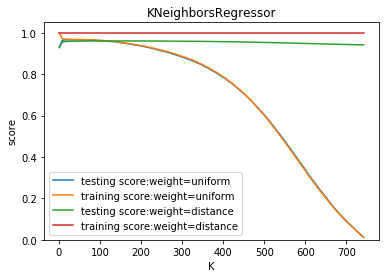

In [14]:
X_train,X_test,y_train,y_test = create_regression_data(1000)
test_KNeighborsRegressor_k_w(X_train,X_test,y_train,y_test)

考察p值对预测性能得影响：

In [16]:
def test_KNeighborsRegressor_k_p(*data):
    X_train,X_test,y_train,y_test = data
    Ks = np.linspace(1,y_train.size,endpoint = False,dtype = 'int')
    Ps = [1,2,10]
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for P in Ps:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            regr = neighbors.KNeighborsRegrssor(p = P, n_neighbors = K)
            regr.fit(X_train,y_train)
            training_scores.append(regr.score(X_train,y_train))
            testing_scores.append(regr.score(X_test,y_test))
        ax.plot(Ks,testing_scores,label="testing score:p=%s"%P)
        ax.plot(Ks,training_scores,label="training score:p=%s"%P)
    ax.legend(loc = 'best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.set_title("KNeighborsRegrssor")
    plt.show()

AttributeError: module 'sklearn.neighbors' has no attribute 'KNeighborsRegrssor'

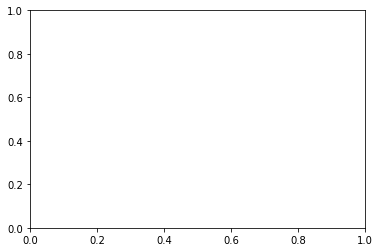

In [17]:
X_train,X_test,y_train,y_test = create_regression_data(1000)
test_KNeighborsRegressor_k_p(X_train,X_test,y_train,y_test)